<a href="https://colab.research.google.com/github/KRWorstRiven/Mat421--/blob/main/StudentPerformanceProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression: Study Hours vs Exam Performance

# Introduction


In this project, we explore how study habits and reading abilities influence student exam performance.
We use Simple Linear Regression to model the relationship between study effort and exam results,
based on two datasets: Kaggle StudentsPerformance and UCI student-mat.


# Mathematical Method


Simple Linear Regression aims to model the relationship between two variables with the equation:

    y = β0 + β1 * x + ε

Where:
- y: Dependent variable (exam score)
- x: Independent variable (study effort, like reading score or study time)
- β0: Intercept (starting value of y when x=0)
- β1: Slope (change in y for each unit change in x)
- ε: Error term

Metrics used:
- R² (coefficient of determination): % of variance in y explained by x
- RMSE (Root Mean Squared Error): typical prediction error



#  Model Assumptions



For simple linear regression to work properly:
- Linearity: Relationship between x and y must be linear.
- Independence: Observations should be independent.
- Homoscedasticity: Constant variance of residuals across x.
- Normality: Residuals should be normally distributed.

# Data
We use two datasets:

1. **StudentsPerformance.csv (Kaggle)**
- Features include math score, reading score, writing score, gender, race, parental education, lunch type, and test preparation course.

2. **student-mat.csv (UCI)**
- Features include grades (G1, G2, G3), study time, absences, failures, and family background.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from google.colab import files
uploaded = files.upload()

Saving student-mat.csv to student-mat.csv
Saving StudentsPerformance.csv to StudentsPerformance.csv


## Load the Datasets

In [2]:
kaggle_data = pd.read_csv('StudentsPerformance.csv')
uci_data = pd.read_csv('student-mat.csv', sep=';')

## Exploratory Data Analysis (EDA)

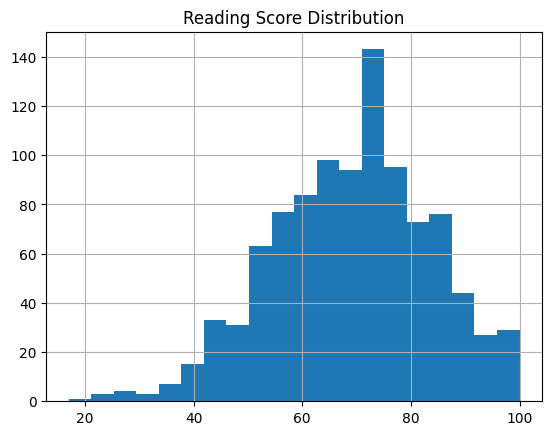

In [3]:
# Kaggle Dataset
kaggle_data['average_score'] = (kaggle_data['math score'] + kaggle_data['reading score'] + kaggle_data['writing score']) / 3
kaggle_data['reading score'].hist(bins=20)
plt.title('Reading Score Distribution')
plt.show()

This histogram shows the distribution of reading scores.
We expect a reasonably wide spread if reading skills vary a lot among students.

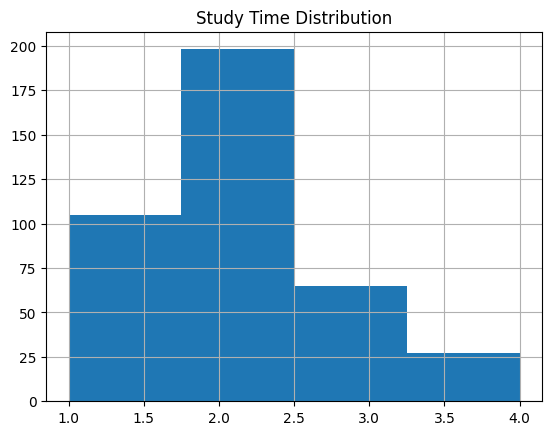

In [4]:
# UCI Dataset
uci_data['average_grade'] = (uci_data['G1'] + uci_data['G2'] + uci_data['G3']) / 3
uci_data['studytime'].hist(bins=4)
plt.title('Study Time Distribution')
plt.show()

Study time is categorical (1–4). Most students fall in the lower study time categories.


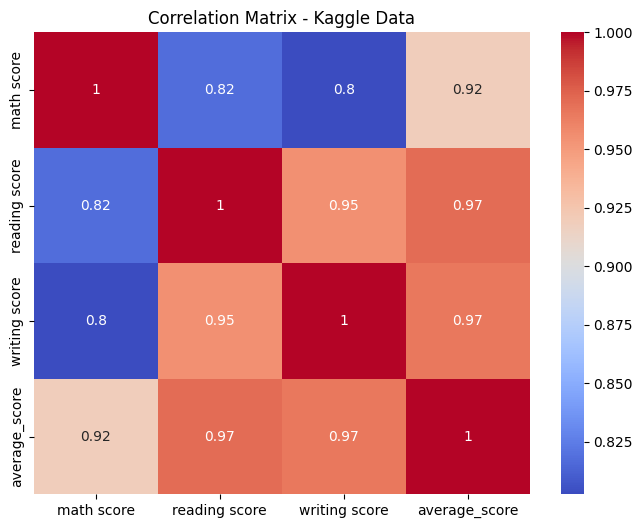

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(kaggle_data[['math score', 'reading score', 'writing score', 'average_score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Kaggle Data')
plt.show()


Strong correlations between reading, writing, and math scores suggest a student's general academic ability is related across subjects.


## Simple Linear Regression Modeling - Kaggle

In [5]:
X_kaggle = kaggle_data[['reading score']]
y_kaggle = kaggle_data['average_score']
X_train_kaggle, X_test_kaggle, y_train_kaggle, y_test_kaggle = train_test_split(X_kaggle, y_kaggle, test_size=0.2, random_state=42)
model_kaggle = LinearRegression()
model_kaggle.fit(X_train_kaggle, y_train_kaggle)
predictions_kaggle = model_kaggle.predict(X_test_kaggle)

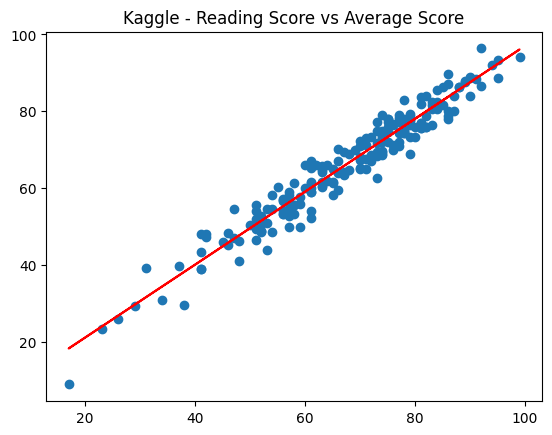

In [6]:
# Scatter plot and regression line
plt.scatter(X_test_kaggle, y_test_kaggle)
plt.plot(X_test_kaggle, predictions_kaggle, color='red')
plt.title('Kaggle - Reading Score vs Average Score')
plt.show()

The scatter plot with the fitted line illustrates how reading scores relate to average exam scores.
 A closer clustering of points around the line indicates a stronger predictive relationship.

In [7]:
# Evaluation
print('R²:', r2_score(y_test_kaggle, predictions_kaggle))
print('RMSE:', np.sqrt(mean_squared_error(y_test_kaggle, predictions_kaggle)))

R²: 0.9429752698667014
RMSE: 3.4963117157611148


A higher R² value indicates that a greater proportion of variance in exam scores is explained by reading scores.
 A lower RMSE means smaller prediction errors on average.

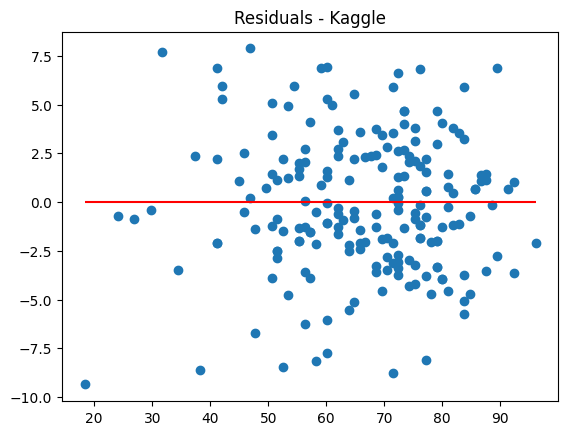

In [8]:
# Residuals plot
residuals_kaggle = y_test_kaggle - predictions_kaggle
plt.scatter(predictions_kaggle, residuals_kaggle)
plt.hlines(y=0, xmin=predictions_kaggle.min(), xmax=predictions_kaggle.max(), color='red')
plt.title('Residuals - Kaggle')
plt.show()

Random scatter around the horizontal line at zero supports that the assumptions of linear regression (especially linearity and constant variance) are met.

The scatter plot with the fitted line illustrates how reading scores relate to average exam scores.  A closer clustering of points around the line indicates a stronger predictive relationship.

## Predictions using Kaggle model

In [9]:
new_scores = pd.DataFrame({'reading score': [60, 80, 95]})
predicted_averages = model_kaggle.predict(new_scores)
predicted_averages

array([59.11225675, 78.06968201, 92.28775096])



## Simple Linear Regression Modeling - UCI

In [11]:
X_uci = uci_data[['studytime']]
y_uci = uci_data['average_grade']
X_train_uci, X_test_uci, y_train_uci, y_test_uci = train_test_split(X_uci, y_uci, test_size=0.2, random_state=42)
model_uci = LinearRegression()
model_uci.fit(X_train_uci, y_train_uci)
predictions_uci = model_uci.predict(X_test_uci)

In [13]:
# Features and labels
X_uci = uci_data[['studytime']]
y_uci = uci_data['average_grade']

# Train-test split
X_train_uci, X_test_uci, y_train_uci, y_test_uci = train_test_split(X_uci, y_uci, test_size=0.2, random_state=42)

# Build and train the model
model_uci = LinearRegression()
model_uci.fit(X_train_uci, y_train_uci)

# Predict
predictions_uci = model_uci.predict(X_test_uci)

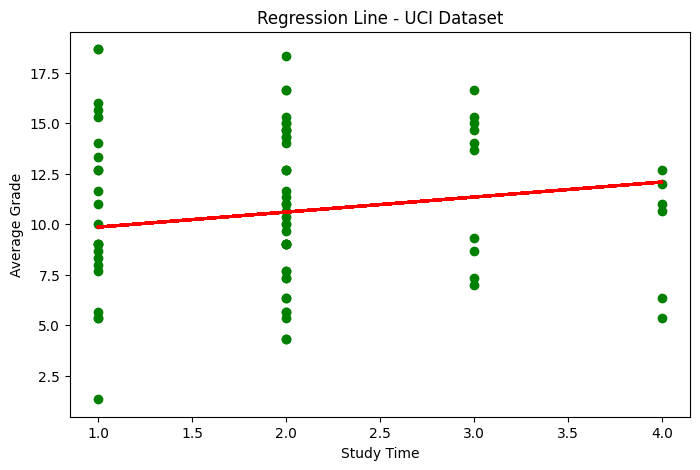

In [14]:
# Scatter plot with regression line
plt.figure(figsize=(8,5))
plt.scatter(X_test_uci, y_test_uci, color='green')
plt.plot(X_test_uci, predictions_uci, color='red', linewidth=2)
plt.title('Regression Line - UCI Dataset')
plt.xlabel('Study Time')
plt.ylabel('Average Grade')
plt.show()

The red line represents the predicted relationship.
 Because study time is categorical and limited (only 1–4), the data points may appear more discrete.

In [12]:
# Evaluation UCI
print('R²:', r2_score(y_test_uci, predictions_uci))
print('RMSE:', np.sqrt(mean_squared_error(y_test_uci, predictions_uci)))

R²: -0.02942336456811323
RMSE: 3.9037818141695952


A lower R² compared to the Kaggle dataset suggests study time is not as strong of a predictor of grades.
 A larger RMSE indicates greater prediction error on average.

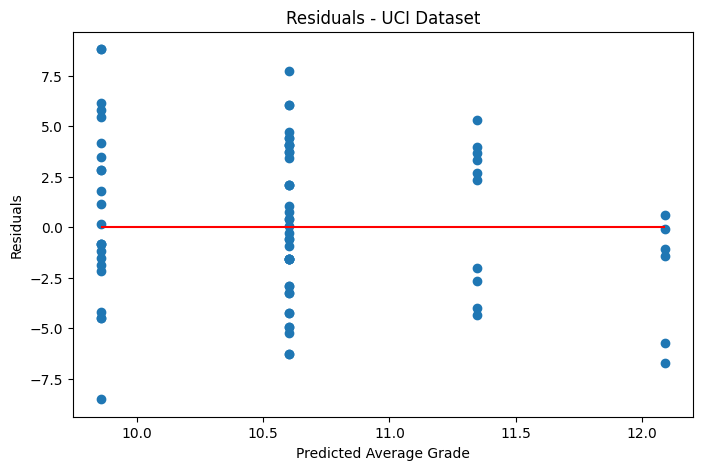

In [16]:
residuals_uci = y_test_uci - predictions_uci

plt.figure(figsize=(8,5))
plt.scatter(predictions_uci, residuals_uci)
plt.hlines(y=0, xmin=predictions_uci.min(), xmax=predictions_uci.max(), colors='red')
plt.title('Residuals - UCI Dataset')
plt.xlabel('Predicted Average Grade')
plt.ylabel('Residuals')
plt.show()


Random scatter around zero would confirm that the linear model is reasonable, even if the predictive power (R²) is weaker

#Example Predictions - Kaggle Model

Let's predict average exam scores based on specific reading scores

In [17]:
example_scores = pd.DataFrame({'reading score': [60, 80, 95]})

predicted_averages = model_kaggle.predict(example_scores)

for score, pred in zip(example_scores['reading score'], predicted_averages):
    print(f"Predicted average exam score for reading score {score}: {pred:.2f}")

Predicted average exam score for reading score 60: 59.11
Predicted average exam score for reading score 80: 78.07
Predicted average exam score for reading score 95: 92.29


The model allows us to estimate what a student's average exam score might be based on their reading ability. Higher reading scores yield higher predicted exam performance, showing a strong positive correlation.

# Example Predictions - UCI Model

Let's predict average grades based on different study time categories

In [18]:
example_studytime = pd.DataFrame({'studytime': [1, 2, 3]})

predicted_grades = model_uci.predict(example_studytime)

for time, pred in zip(example_studytime['studytime'], predicted_grades):
    print(f"Predicted average grade for study time {time}: {pred:.2f}")



Predicted average grade for study time 1: 9.86
Predicted average grade for study time 2: 10.60
Predicted average grade for study time 3: 11.35


Higher study time categories correspond to slightly higher average grades according to the model, but the effect size is weaker than in the Kaggle reading score model.





## Conclusion
- In the Kaggle dataset, reading score strongly predicted average exam scores.
- In the UCI dataset, study time had a weaker but positive relationship with average grade.
- The Kaggle model showed a higher R² and lower RMSE than the UCI model, suggesting stronger predictive power.

Overall:
- Reading ability appears to be a very important predictor of academic success.
- Study time matters, but is not the only factor influencing grades.
- Residual plots show no major patterns, supporting the validity of the linear models.

Limitations:
- Study time in UCI dataset is categorical and broad.
- Other variables (family support, health, absences) could impact results.

Future Work:
- Use multiple linear regression with additional variables.
- Explore non-linear models if relationships are more complex.

## References
- Kaggle: Students Performance in Exams
- UCI: Student Performance Dataset
- Scikit-learn Documentation
- Introduction to Statistical Learning (ISLR)